In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\akintayo.akinpelu\Desktop\DS+ML+DL\ineuron\Projects\Machine Learning\Project-Insurance_Premium_Prediction\insurance\artifact\data_ingestion\2022-08-04-14-25-25\raw_data\insurance.csv")

In [3]:
df.head(20)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape

(1338, 7)

In [6]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [8]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot:>

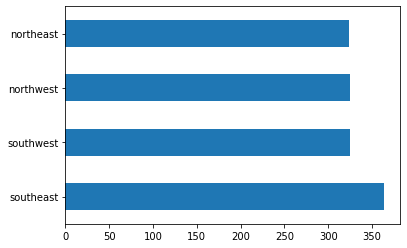

In [9]:
df['region'].value_counts().plot(kind='barh')

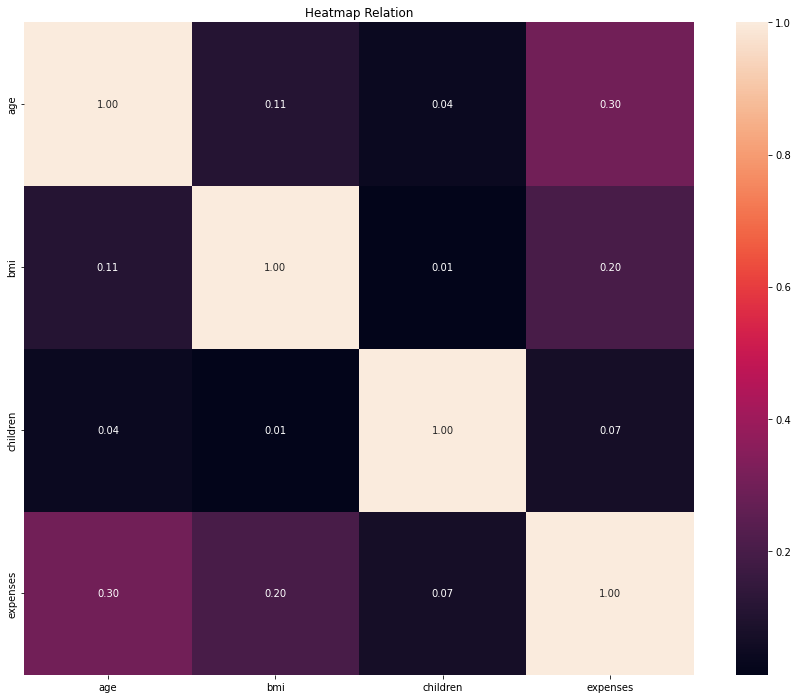

In [10]:
import seaborn as sns
plt.figure(figsize=(15, 12))

plt.title("Heatmap Relation")

sns.heatmap(df.corr(), annot=True, fmt='.2f');

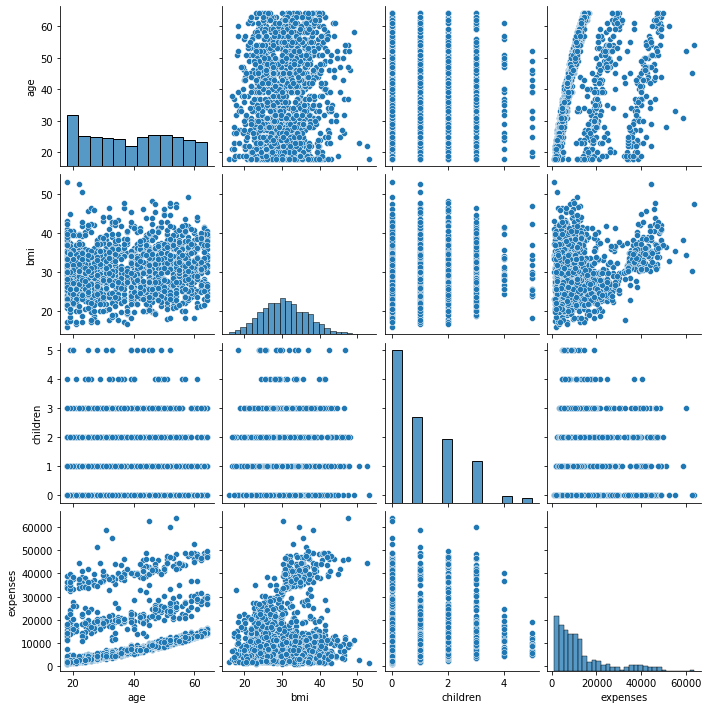

In [11]:
sns.pairplot(df.select_dtypes(include=['int64','float64']))

KeyboardInterrupt: 

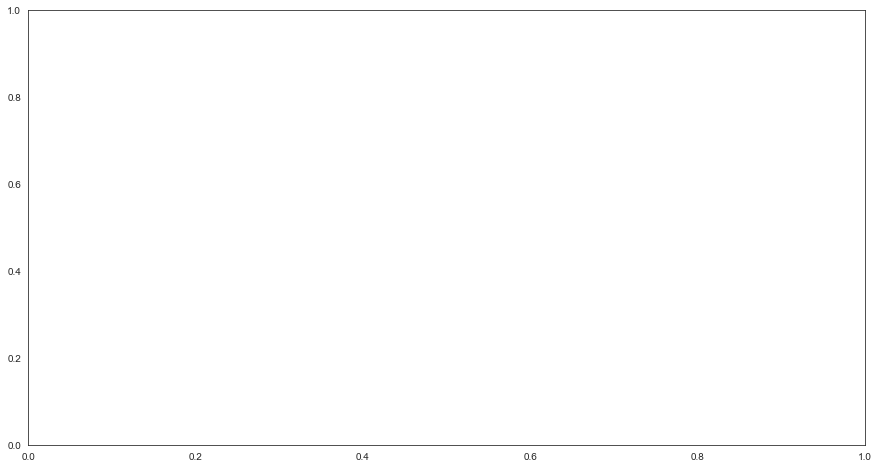

In [13]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
sns.barplot(x='bmi', y='age', data=df[['bmi','age','expenses']], hue='expenses',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()


In [ ]:
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='bmi', y='age', data=df[['bmi','age','children']], hue='children',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()

In [23]:
df["bmi_category"] = pd.cut(df["bmi"], 
                            bins=[10.0, 20.0, 30.0, 40.0, 50.0, np.inf], 
                            labels=[1,2,3,4,5])

In [24]:
df["bmi_category"].unique()

[2, 3, 4, 1, 5]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

<AxesSubplot:ylabel='Frequency'>

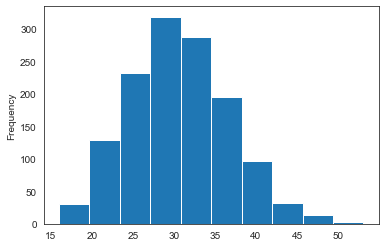

In [22]:
df["bmi"].plot(kind="hist")

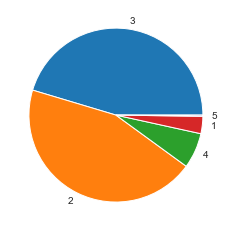

In [26]:
plt.pie(df['bmi_category'].value_counts(), labels = df.bmi_category.value_counts().index)
plt.show()

In [27]:
df.dtypes

age                int64
sex               object
bmi              float64
children           int64
smoker            object
region            object
expenses         float64
bmi_category    category
dtype: object

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

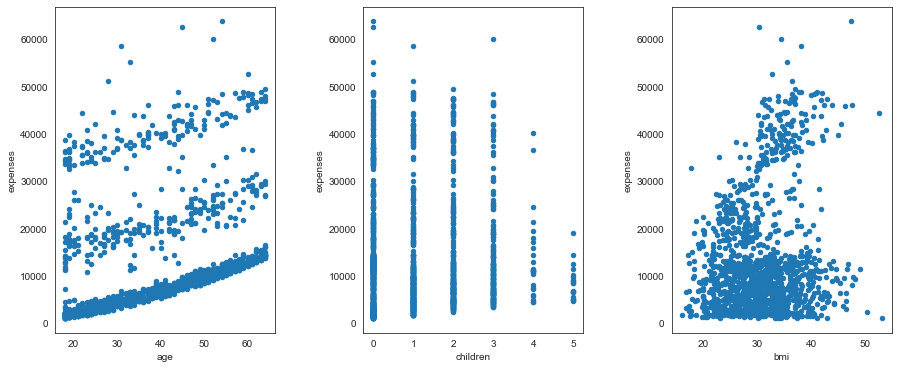

In [28]:
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
df.plot(kind='scatter', x='age', y='expenses', ax=axes[0])
df.plot(kind='scatter', x='children', y='expenses', ax=axes[1])
df.plot(kind='scatter', x='bmi', y='expenses', ax=axes[2])

<AxesSubplot:ylabel='Frequency'>

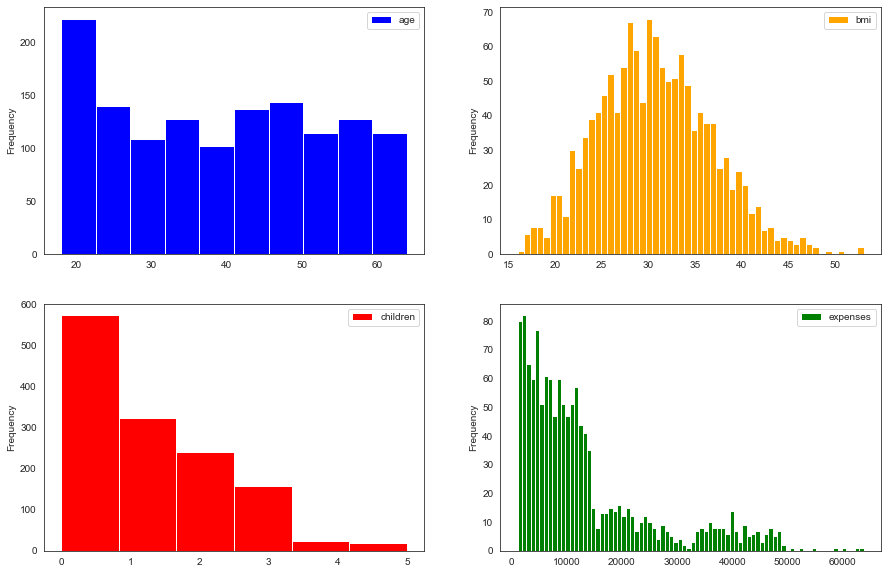

In [29]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))

df.plot(kind='hist', y='age', ax=axes[0][0], color = 'blue')
df.plot(kind='hist', y='bmi', ax=axes[0][1], color = 'orange', bins = 54)
df.plot(kind='hist', y='children', ax=axes[1][0], color = 'red', bins = 6)
df.plot(kind='hist', y='expenses', ax=axes[1][1], color = 'green', bins = 80)

<AxesSubplot:title={'center':'Smoker'}>

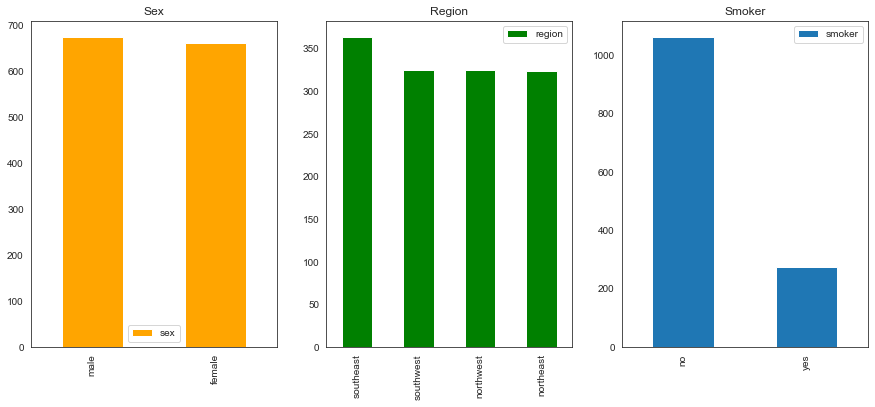

In [30]:
fig, axes = plt.subplots(ncols=3, figsize = (15,6))
df['sex'].value_counts().plot(kind='bar', color = 'orange', ax=axes[0],title="Sex", legend = 'sex') 
df['region'].value_counts().plot(kind='bar', color = 'green', ax=axes[1],title="Region", legend = 'region')
df['smoker'].value_counts().plot(kind='bar', ax=axes[2],title="Smoker", legend = 'smoker')

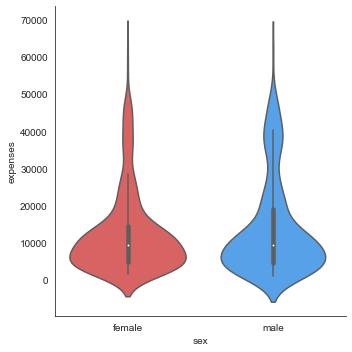

In [31]:
palette=['#EB5050','#3EA2FF']
sns.catplot(x='sex', y='expenses', kind='violin', palette=palette, data=df)

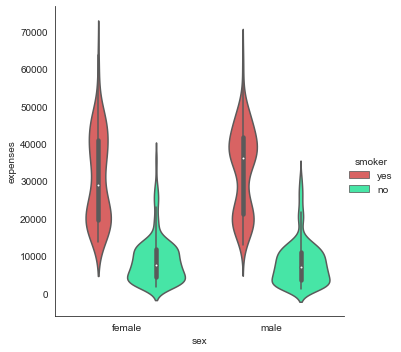

In [32]:
palette=['#EB5050','#2DFFAB'] 
sns.catplot(x='sex', y='expenses', kind='violin', hue='smoker', palette=palette, data=df)

c:\Users\akintayo.akinpelu\Desktop\DS+ML+DL\ineuron\Projects\Machine Learning\Project-Insurance_Premium_Prediction\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Charges')

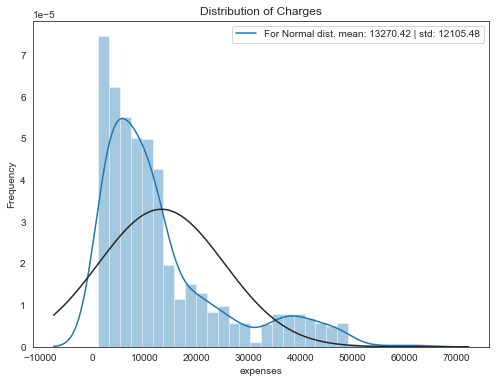

In [33]:
from scipy import stats
from scipy.stats import norm
fig =plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(df['expenses'], fit=norm)
(mu,sigma)= norm.fit(df['expenses'])
plt.legend(['For Normal dist. mean: {:.2f} | std: {:.2f}'.format(mu,sigma)])
plt.ylabel('Frequency')
plt.title('Distribution of Charges')